<a href="https://colab.research.google.com/github/Darshini-A/Data-Storage-Management/blob/main/Stock%20Prediction%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import Line
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
df = pd.read_pickle('/content/SIEMENS-15minute-Hist.unknown')
df = pd.DataFrame(df)
df['date'] = df['date'].apply(pd.to_datetime)
df.set_index('date',inplace=True)
df.head()

open     high      low    close  volume
date                                                                 
2015-02-02 09:15:00+05:30  1039.00  1066.00  1039.00  1053.00   31842
2015-02-02 09:30:00+05:30  1053.00  1062.00  1052.05  1061.15   14927
2015-02-02 09:45:00+05:30  1061.90  1076.35  1061.20  1076.00   40231
2015-02-02 10:00:00+05:30  1076.00  1087.90  1073.55  1077.65   53797
2015-02-02 10:15:00+05:30  1076.95  1089.40  1075.05  1088.00   29979

In [ ]:
fig = go.Figure(data = [go.Table(
    header=dict(values=list(['date', 'open', 'high', 'low', 'close', 'volume']),
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[df.index, df.open, df.high, df.low, df.close, df.volume],
               fill_color='lavender',
               align='left'))
])
fig.show()

In [ ]:
fig = make_subplots(rows=4, cols=1, subplot_titles=('Open', 'High', 'Low', 'Close'))

fig.add_trace(
    Line(x=df.index, y=df.open),
    row=1, col=1)
fig.add_trace(
    Line(x=df.index, y=df.high),
    row=2, col=1)
fig.add_trace(
    Line(x=df.index, y=df.low),
    row=3, col=1)
fig.add_trace(
    go.Line(x=df.index, y=df.close),
    row=4, col=1)

fig.update_layout(height=1400, width=1000, title_text="OHLC Line Plots")
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




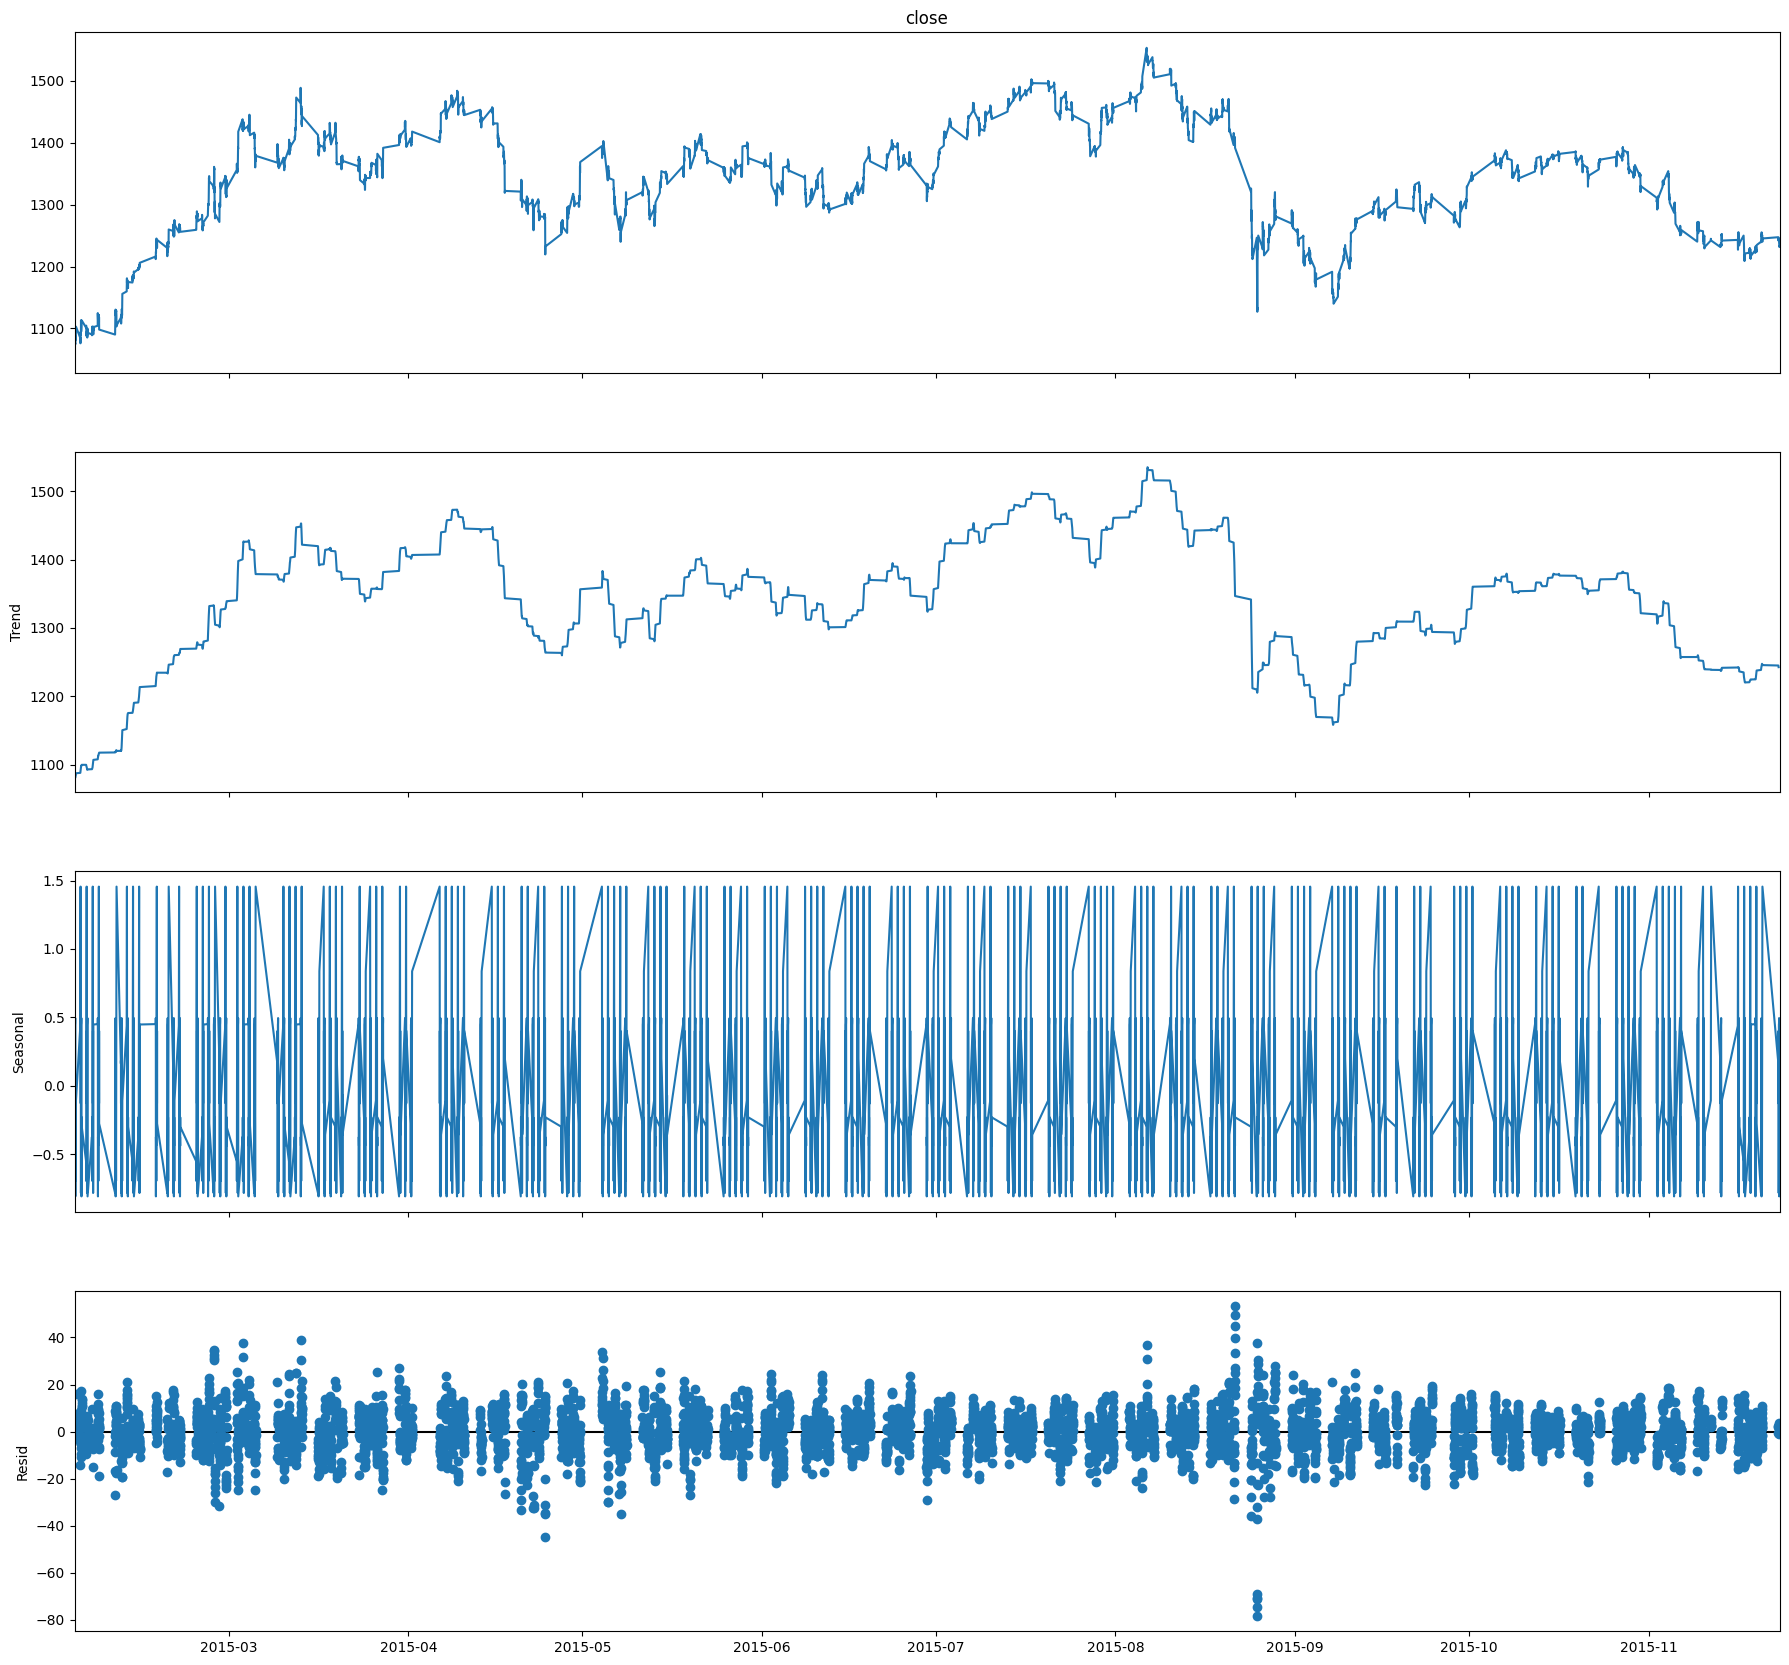

In [ ]:
result = seasonal_decompose(df.close.head(5000), model='additive', period = 30)
fig = go.Figure()
fig = result.plot()
fig.set_size_inches(20, 19)

In [ ]:
open_data = [33.0, 33.3, 33.5, 33.0, 34.1]
high_data = [33.1, 33.3, 33.6, 33.2, 34.8]
low_data = [32.7, 32.7, 32.8, 32.6, 32.8]
close_data = [33.0, 32.9, 33.3, 33.1, 33.1]

dates = [datetime(year=2013, month=10, day=10),
         datetime(year=2013, month=11, day=10),
         datetime(year=2013, month=12, day=10),
         datetime(year=2014, month=1, day=10),
         datetime(year=2014, month=2, day=10)]

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=dates,
                                     open=open_data, high=high_data,
                                     low=low_data, close=close_data,
                                     increasing_line_color = 'green', decreasing_line_color= 'red')
])
fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
 open=df['open'],
 high=df['high'],
 low=df['low'],
 close=df['close'])])
fig.show()

In [ ]:
new_df = pd.DataFrame()
new_df = df['close']
new_df.index = df.index

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
final_dataset = new_df.values
train_data = final_dataset[0:20000,]
valid_data = final_dataset[20000:,]
train_df = pd.DataFrame()
valid_df = pd.DataFrame()
train_df['Close'] = train_data
train_df.index = new_df[0:20000].index
valid_df['Close'] = valid_data
valid_df.index = new_df[20000:].index
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_dataset.reshape(-1,1))
x_train_data, y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data = new_df[len(new_df)-len(valid_data)-60:].values
inputs_data = inputs_data.reshape(-1,1)
inputs_data = scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_test = []
for i in range(60, inputs_data.shape[0]):
 X_test.append(inputs_data[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_closing_price = lstm_model.predict(X_test)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

200/200 [==============================] - 5s 15ms/step


In [ ]:
valid_df['Predictions'] = predicted_closing_price
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index,y=train_df['Close'],
                         mode='lines',
                         name='Siemens Train Data'))
fig.add_trace(go.Scatter(x=valid_df.index,y=valid_df['Close'],
                         mode='lines',
                         name='Siemens Valid Data'))
fig.add_trace(go.Scatter(x=valid_df.index,y=valid_df['Predictions'],
                         mode='lines',
                         name='Prediction'))